<a href="https://colab.research.google.com/github/safiqul-islam/QoEresearch/blob/main/thesisdinalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import copy

user = 400
pathvector = []
EN = 12
path = EN * 0.2
weight = 0.6
accuracy = 0.65
MaxCapEN = 150
tDeploy = 600
# serverbudget = 112500

W=100 #wireless bandwidth of MEC node 𝑚 = 100Mbps
a=((1+10**-6)/10**-9)

i=math.log(a,2)
r=(W*i)*1000 #to transform Mbps to Kbps
taskSize= []
TaskWorkReq=[]
WiredBandthWidth= 8*900000 #Mbps to Kbps
for j in range(user):
  tempSave=random.randrange(500,900) #task size KB
  taskSize.append(tempSave*8) #KB to Kb
  TaskWorkReq.append(random.randrange(50,150))#Cycle per Kb

#for very first solution 
for j in range(user):
    pathvector.append([])
    cnt = 0
    for k in range(EN):
        if cnt < path:
            a = random.randrange(0, 2, 1)
            if a == 1:
                cnt += 1
            pathvector[j].append(a)
        else:
            pathvector[j].append(0)

In [ ]:
def fitness(normalizedQoE, normalizedCost):
    return (weight * normalizedQoE) - ((1-weight)*normalizedCost)

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig



In [ ]:
particle = 20
probability = []
mout = []
for p in range(particle):
    probability.append([])
    for j in range(user):
        probability[p].append([])
        for k in range(EN):
            if pathvector[j][k] == 1:
                probability[p][j].append(round(random.uniform(0.65, 1), 2))
            else:
                probability[p][j].append(round(random.uniform(0, 0.65), 2))


In [ ]:
budget = [random.randrange(50, 200, 1) for j in range(0, user)]
print(budget)

[178, 140, 108, 177, 133, 194, 168, 182, 102, 124, 110, 139, 191, 132, 176, 113, 99, 143, 172, 139, 95, 174, 170, 168, 119, 196, 170, 86, 87, 125, 55, 83, 147, 72, 143, 117, 185, 139, 177, 77, 57, 113, 140, 149, 72, 148, 115, 86, 141, 90, 81, 156, 83, 116, 120, 55, 172, 114, 105, 138, 70, 72, 182, 147, 76, 99, 66, 194, 105, 154, 176, 151, 179, 99, 172, 99, 194, 110, 178, 193, 191, 174, 74, 73, 189, 139, 151, 127, 97, 54, 187, 100, 148, 102, 71, 180, 73, 198, 54, 196, 196, 188, 187, 82, 196, 196, 188, 134, 113, 126, 189, 140, 111, 104, 189, 141, 144, 199, 185, 147, 96, 104, 124, 190, 165, 195, 149, 174, 100, 156, 80, 166, 190, 181, 95, 93, 71, 147, 149, 178, 88, 118, 110, 148, 160, 177, 191, 60, 185, 79, 112, 103, 100, 178, 104, 180, 155, 165, 126, 196, 147, 105, 183, 105, 156, 99, 131, 198, 93, 133, 142, 135, 163, 194, 77, 189, 117, 64, 132, 132, 199, 97, 107, 127, 115, 120, 70, 195, 73, 169, 107, 118, 76, 185, 188, 57, 109, 105, 163, 76, 50, 194, 116, 166, 133, 108, 130, 197, 179, 56,

In [ ]:
Xij = [[[0 for k in range(0, EN)] for j in range(0, user)] for p in range(particle)]
normalizedQoE = 0
normalizeCost = 0

In [ ]:
RemCap_1=[random.randrange(30000000000,40000000000) for k in range(0,EN)]
deadline = [random.uniform(2, 3) for j in range(0, user)]

In [ ]:
def DelyFunc(PathVEC):
  TUpDown= []
  TMig = []
  TProc = []
  RemCap = RemCap_1.copy()
  CapacityOfEdge= [0 for k in range(0, EN)]
  for j in range(user):
    TUpDown.append([])
    TMig.append([])
    TProc.append([])
    for l in range(EN):
      TUpDown[j].append(0)
      TMig[j].append(0)
      TProc[j].append(0)

  for j in range(user):
    T=((taskSize[j])/r) #upload and download time
    for l in range(EN):

      if PathVEC[j][l]==1 :  
        TUpDown[j][l]=round(T,3)

#Migration time
  for j in range(user):
    serverCount=0
    T= taskSize[j]/ WiredBandthWidth    
    for i in range(EN):     
      if PathVEC[j][i]==1 and serverCount!=0:
        TMig[j][i] = round(T,3)
      serverCount+=1

#Computation Time
  for j in range(user):
    tempSave=taskSize[j]*TaskWorkReq[j]
    for i in range(EN):
      if PathVEC[j][i]==1 and CapacityOfEdge[i]<MaxCapEN:
        TProc[j][i]=round((tempSave/(RemCap[i])),3)
        CapacityOfEdge[i]+=1

  TDelay=[]
  for j in range(user):
    TDelay.append([])
    for i in range(EN):
      TDelay[j].append(0)
      TDelay[j][i]=round(((TUpDown[j][i]*2)+TMig[j][i]+TProc[j][i]),3)
      
  return TDelay

In [ ]:
print("function call", DelyFunc(pathvector))

function call [[0.004, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.005, 0.005, 0, 0.005, 0, 0, 0, 0], [0.002, 0.003, 0.003, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.003, 0, 0, 0, 0.003, 0.003, 0, 0, 0, 0, 0], [0.004, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0], [0, 0, 0.005, 0, 0, 0.005, 0, 0.005, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0, 0, 0], [0.004, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.005, 0.005, 0, 0.005, 0, 0, 0, 0, 0, 0, 0], [0.002, 0.003, 0.003, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.003, 0.003, 0.003, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0, 0, 0, 0], [0, 0.005, 0, 0.005, 0, 0.005, 0, 0, 0, 0, 0, 0], [0, 0.005, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0], [0.004, 0, 0.005, 0, 0.005, 0, 0, 0, 0, 0, 0, 0], [0.004, 0.005, 0, 0, 0.005, 0, 0, 0, 0, 0, 0, 0], [0.004, 0, 0.005, 0, 0, 0.005, 0, 0, 0, 0, 0, 0], [0.004, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0.005], [0.002, 0.003, 0, 0, 0, 0, 0.003, 0

In [ ]:
#allocation code
unitResourceCost = [[random.uniform(0.04,0.05) for i in range(0, EN)] for j in range(0, user)]
userCostList = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]

Xij = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]
TProc_1 = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]
TUpDown_1 = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]
TMig_1 = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]
TDelay_1 = [[[0 for i in range(0, EN)] for j in range(0, user)]for p in range(particle)]
UC=[0 for p in range(0, particle)]
CE= [0 for k in range(0, EN)]

for p in range(particle):
  RemCap = copy.deepcopy(RemCap_1)
  budget_1 =  copy.deepcopy(budget)
  countEdgeNodeCap = [0 for i in range(0, EN)]
  URC=copy.deepcopy(unitResourceCost)
  CapacityOfEdge_1= copy.deepcopy(CE)
  for j in range(user):
    userCost = 0
    pathQuality = 0
    noPathQuality = 0
    tempSave=taskSize[j]*TaskWorkReq[j]
    Tu=((taskSize[j])/r)
    Tm= taskSize[j]/ WiredBandthWidth
    serverCount=0 
    for i in range(EN):
      if probability[p][j][i] > 0.75  and CapacityOfEdge_1[i] < MaxCapEN:
        TProc_1[p][j][i]=round((tempSave/(RemCap[i])),3)
        TUpDown_1[p][j][i]=round(Tu,3)
        if serverCount!=0:
          TMig_1[p][j][i] = round(Tm,3)
        serverCount+=1
        Td= (TUpDown_1[p][j][i]*2)+TMig_1[p][j][i]+TProc_1[p][j][i]
        TDelay_1[p][j][i]=round(Td,3)

        userCost += URC[j][i] * tDeploy
        userCostList[p][j][i]=round((URC[j][i] * tDeploy),3)

        if TDelay_1[p][j][i] < deadline[j] and budget_1[j]>= userCost:
          Xij[p][j][i] = 1
          CapacityOfEdge_1[i]+=1
          
        # userCost += URC[j][i] * tDeploy
        # userCostList[p][j][i]=round((URC[j][i] * tDeploy),3)
        # countEdgeNodeCap[i] += tempSave

    # print(userCost)

#print(time)
# for p in range(particle):
#   print("place",Xij[p])
#   print("tdelay",TDelay_1[p])


In [ ]:
#cost function
def Cost(PathVEC):
  userCostList = [[0 for j in range(0, EN)] for i in range(0, user)] 
  URC = [[0 for i in range(0, EN)] for j in range(0, user)]
  URC = copy.deepcopy(unitResourceCost)
  for j in range(user):
    userCost = 0
    for i in range(EN):
      if PathVEC[j][i]==1:
        userCost = URC[j][i] * tDeploy
        userCostList[j][i] = userCost
  return userCostList


In [ ]:
# Cost(pathvector)

In [ ]:
#Qoe function
def quality(PathVEC):
  QoEpji=[[0 for i in range(0, EN)] for j in range(0, user)]
  delay = [[0 for i in range(0, EN)] for j in range(0, user)]
  delay = copy.deepcopy(DelyFunc(PathVEC))
  for j in range(user):
    for i in range(EN):
      if PathVEC[j][i]==1:
        QoEpji[j][i] = round((1-(delay[j][i]/deadline[j])),3)
  return QoEpji

In [ ]:
# quality(pathvector)


In [ ]:
def ParticleFitness(particleVEC):

  costji = [[0 for i in range(0, EN)]for j in range(0, user)]
  QoEpji=[[0 for i in range(0, EN)] for j in range(0, user)]
  NormCost=[[0 for i in range(0, EN)] for j in range(0, user)]
  NormQoE = [[0 for i in range(0, EN)] for j in range(0, user)]


  costji = copy.deepcopy(Cost(particleVEC))
  QoEpji = copy.deepcopy(quality(particleVEC))
  Fit = 0 
  for j in range(user):
    for i in range(EN):
      if particleVEC[j][i] == 1 :

        NormQoE[j][i] =  round((accuracy*pathvector[j][i]+((1-accuracy)*(1-pathvector[j][i])))*QoEpji[j][i],3)
        NormCost[j] = round(costji[j][i]/ budget[j],5)
        Fit += fitness(NormQoE[j][i],NormCost[j])
  return Fit



In [ ]:
# ParticleFitness(pathvector)

In [ ]:
#InitFitness
Fit_list=[0 for p in range(0, particle)]
for p in range(particle):
  Fit_list[p] = round(ParticleFitness(Xij[p]),3)
InitialFitList = copy.deepcopy(Fit_list)

for p in range(particle):
  print("fitness of particle",InitialFitList[p])
  # print(Xij[p])

        


fitness of particle 233.362
fitness of particle 237.641
fitness of particle 233.802
fitness of particle 235.127
fitness of particle 231.13
fitness of particle 235.765
fitness of particle 239.201
fitness of particle 239.311
fitness of particle 235.847
fitness of particle 233.928
fitness of particle 237.444
fitness of particle 231.628
fitness of particle 236.409
fitness of particle 241.779
fitness of particle 226.793
fitness of particle 246.527
fitness of particle 237.465
fitness of particle 231.473
fitness of particle 236.917
fitness of particle 233.512


In [ ]:

def SinCosine(solution1):
# sine cosine implementation
  agent = particle
  tmax = 20
  t=0
  # MaxCapEN = 150
  temp = 0
  pnum = 0
  L = [[0 for i in range(0, EN)] for j in range(0, user)]
  Yij = copy.deepcopy(solution1)
  z = 2 


  for p in range(particle):
      best = Fit_list[p]
      if best>temp:
        temp = best
        pnum = p
      for j in range(user):
        for i in range(EN):
          L[j][i] = Yij[pnum][j][i]
  # print("Initial Best fitness:",temp)


  while t < tmax:
    RemCap = RemCap_1.copy()
    budget_1 = budget.copy()
    
    URC=unitResourceCost.copy()
    
    for a in range(agent):
      CapacityOfEdge_1 = [0 for i in range(0, EN)]
    
      r1 = (z-(t*(z/tmax)))
      r2 = 2*math.pi*random.uniform(0.0,1.0)
      r3 = 2*random.uniform(0.0,1.0)
      r4 = random.uniform(0.0,1.0)
   
      for j in range(user):

        userCost = 0
      #   pathQuality = 0
      #   noPathQuality = 0
        tempSave=taskSize[j]*TaskWorkReq[j]
        Tu=((taskSize[j])/r)
        Tm= taskSize[j]/ WiredBandthWidth
        serverCount=0 
        for i in range(EN):
          if r4 < 0.5:
            fpos = Yij[a][j][i] + (r1*math.sin(r2)*abs(r3*L[j][i]-Yij[a][j][i]))
          else:
            fpos = Yij[a][j][i] + (r1*math.cos(r2)*abs(r3*L[j][i]-Yij[a][j][i]))
          sigvalue = sigmoid(fpos)
          rantem = random.uniform(0, 1)
          # print("sig",sigvalue)
          # print("ran",rantem)


          if sigvalue >= rantem and CapacityOfEdge_1[i] < MaxCapEN:
            TProc_1[a][j][i]=round((tempSave/(RemCap[i])),3)
            TUpDown_1[a][j][i]=round(Tu,3)
            if serverCount!=0:
              TMig_1[a][j][i] = round(Tm,3)
            serverCount+=1
            Td= (TUpDown_1[a][j][i]*2)+TMig_1[a][j][i]+TProc_1[a][j][i]
            TDelay_1[a][j][i]=round(Td,3)

            userCost += URC[j][i] * tDeploy
            userCostList[a][j][i]=round((URC[j][i] * tDeploy),3)
            if TDelay_1[p][j][i] < deadline[j] and userCost <= budget[j]:
              Yij[a][j][i] = 1
              CapacityOfEdge_1[i]+=1
              
            else:
              Yij[a][j][i] = 0

          else:
            Yij[a][j][i] = 0
            
      SinFit=round(ParticleFitness(Yij[a]),3)
      # print(SinFit,Yij[a])
      if temp<SinFit:
        temp=SinFit
        for j in range(user):
          for i in range(EN):
            L[j][i] = Yij[a][j][i]

    # print("After Sine Cosine",temp,"perticle")
    t += 1
  return temp,L
  


In [ ]:
# SinCosine(Xij)

In [ ]:
def JellyFish(solution):
  agent = particle
  tmax = 20
  t=0
  temp = 0
  # MaxCapEN = 150
  pnum = 0
  L = [[0 for i in range(0, EN)] for j in range(0, user)]
  YMean=[[0 for i in range(0, EN)] for j in range(0, user)]
  Yij = copy.deepcopy(solution)

  for p in range(particle):
      best = Fit_list[p]
      if best>temp:
        temp = best
        pnum = p
      for j in range(user):
        for i in range(EN):
          L[j][i] = Yij[pnum][j][i]
  # print("Initial Best fitness:",temp)

  #mean position calculation
  while t < tmax:
    for j in range(user):
      for i in range(EN):
        meanStor=0
        for a in range(agent):
          meanStor+=Yij[a][j][i]
        YMean[j][i] = meanStor/agent
    # print(YMean)
    for a in range(agent):
      RemCap = RemCap_1.copy()
      countEdgeNodeCap = [0 for i in range(0, EN)]
      URC=unitResourceCost.copy()
      CapacityOfEdge_1=CE.copy()

      tControl =round(abs((1-t/tmax) * (2 * random.uniform(0, 1) - 1)),3)
      Comp_Fish = random.randint(0,agent-1)
      FitOFCF = round(ParticleFitness(Yij[Comp_Fish]),3)
      ThisFit= round(ParticleFitness(Yij[a]),3)
      for j in range(user):
        userCost = 0
      #   pathQuality = 0
      #   noPathQuality = 0
        tempSave=taskSize[j]*TaskWorkReq[j]
        Tu=((taskSize[j])/r)
        Tm= taskSize[j]/ WiredBandthWidth
        serverCount=0 
        for i in range(EN):
          if tControl >= 0.5:
            fpos=Yij[a][j][i] + (random.uniform(0, 1)*(L[j][i]- 3*random.uniform(0, 1)*YMean[j][i]))
          else:
            if random.uniform(0, 1)>(1-tControl):
              fpos=Yij[a][j][i] + (random.uniform(0, 1) * 0.1 )
            else:
              if ThisFit>FitOFCF:
                fpos=Yij[a][j][i] + random.uniform(0, 1)*(Yij[a][j][i]-Yij[Comp_Fish][j][i])
              else:
                fpos=Yij[a][j][i] + random.uniform(0, 1)*(Yij[Comp_Fish][j][i]-Yij[a][j][i])
          # print("FPOS",fpos)
          sigvalue = sigmoid(fpos)
        # print(sigvalue)
          rantem = round(random.uniform(0, 1),3)
          if sigvalue >= rantem   and CapacityOfEdge_1[i] < MaxCapEN:
            TProc_1[a][j][i]=round((tempSave/(RemCap[i])),3)
            TUpDown_1[a][j][i]=round(Tu,3)
            if serverCount!=0:
              TMig_1[a][j][i] = round(Tm,3)
            serverCount+=1
            Td= (TUpDown_1[a][j][i]*2)+TMig_1[a][j][i]+TProc_1[a][j][i]
            TDelay_1[a][j][i]=round(Td,3)

            userCost += URC[j][i] * tDeploy
            userCostList[a][j][i]=round((URC[j][i] * tDeploy),3)
            if TDelay_1[p][j][i] < deadline[j] and userCost <= budget[j]:
              Yij[a][j][i] = 1
              CapacityOfEdge_1[i]+=1
              
            else:
              Yij[a][j][i] = 0
            # countEdgeNodeCap[i] += 1
          else:
            Yij[a][j][i] = 0
      JellyFit=round(ParticleFitness(Yij[a]),3)
      if temp<JellyFit:
        temp=JellyFit
        for j in range(user):
          for i in range(EN):
            L[j][i] = Yij[a][j][i]

      #print(JellyFit,"-:Fit of",a,Yij[a][j][i])
    # print("After JellyFIsh",temp)
    t += 1
  return temp,L




In [ ]:
# JellyFish(Xij)

In [ ]:

# New Golden eagle optimizer implementation


def goldeneagle(solution):
    agent = particle
    tmax = 20
    # MaxCapEN = 150
    t = 0
    temp = 0
    pnum = 0
    SinFit = 0
    L = [[0 for i in range(0, EN)] for j in range(0, user)]
 

    (PA0, PAT) = (0.5, 2)
    (PC0, PCT) = (1, 0.5)
    # MemoryofFolk = [InitialFitList[p] for p in range(particle)]
    MemoryofFolk = [0 for p in range(particle)]
    MemoryofFolk = copy.deepcopy(InitialFitList)


    Yij = copy.deepcopy(solution)


    while t < tmax:

        PA = round(PA0 + t / tmax * abs(PAT - PA0), 4)
        PC = round(PC0 - t / tmax * abs(PCT - PC0), 4)
        Attackvector = [[[0 for i in range(0, EN)] for j in range(0,
                        user)] for p in range(particle)]
        Crusevector = [[[0 for i in range(0, EN)] for j in range(0,
                       user)] for p in range(particle)]
        Stepvec = [[[0 for i in range(0, EN)] for j in range(0, user)]
                   for p in range(particle)]
        magniA = [0 for p in range(particle)]
        magniC = [0 for p in range(particle)]
        SumAX = [0 for p in range(particle)]
        SumA = [0 for p in range(particle)]

        for p in range(agent):
            preloc = random.choice(range(1, agent))
            Prey = Yij[preloc].copy()
            Egle = Yij[p].copy()

            RemCap = RemCap_1.copy()
            budget_1 = budget
            countEdgeNodeCap = [0 for i in range(0, EN)]
            URC = unitResourceCost.copy()
            fixJ = random.choice(range(1, user))
            fixI = random.choice(range(1, EN))

            for j in range(user):
                for i in range(EN):
                    Attackvector[p][j][i] = Prey[j][i] - Egle[j][i]
                    SumAX[p] = SumAX[p] + Attackvector[p][j][i] \
                        * Egle[j][i]
                    SumA[p] = SumA[p] + Attackvector[p][j][i]
                    magniA[p] = magniA[p] + Attackvector[p][j][i] ** 2

            magniA[p] = math.sqrt(magniA[p])
            SumA[p] = SumA[p] - Attackvector[p][fixJ][fixI]

            if magniA[p] != 0:
                Crusevector[p] = [[random.randint(0, 1) for i in
                                  range(0, EN)] for J in range(0, user)]
                if Attackvector[p][fixJ][fixI] != 0:
                    Crusevector[p][fixJ][fixI] = (SumAX[p] - SumA[p]) \
                        / Attackvector[p][fixJ][fixI]
                else:
                    Crusevector[p][fixJ][fixI] = 0
                for j in range(user):
                    for i in range(EN):
                        magniC[p] = magniC[p] + Crusevector[p][j][i] \
                            ** 2
                magniC[p] = math.sqrt(magniC[p])
                for j in range(user):
                    userCost = 0
                    tempSave = taskSize[j] * TaskWorkReq[j]
                    Tu = taskSize[j] / r
                    Tm = taskSize[j] / WiredBandthWidth
                    serverCount = 0
                    for i in range(EN):
                        ts1 = random.uniform(0, 1) * PA \
                            * (Attackvector[p][j][i] / magniA[p])
                        ts2 = random.uniform(0, 1) * PC \
                            * (Crusevector[p][j][i] / magniC[p])
                        Stepvec[p][j][i] = ts1 + ts2


                        fpos = Egle[j][i] + Stepvec[p][j][i]
                        sigvalue = sigmoid(fpos)
                        rantem = round(random.uniform(0, 1), 3)
                        if sigvalue >= rantem  and countEdgeNodeCap[i] < MaxCapEN:
                            TProc_1[p][j][i] = round(tempSave
                                    / RemCap[i], 3)
                            TUpDown_1[p][j][i] = round(Tu, 3)
                            if serverCount != 0:
                                TMig_1[p][j][i] = round(Tm, 3)
                            serverCount += 1
                            Td = TUpDown_1[p][j][i] * 2 \
                                + TMig_1[p][j][i] + TProc_1[p][j][i]
                            TDelay_1[p][j][i] = round(Td, 3)
                            userCost += URC[j][i] * tDeploy
                            userCostList[p][j][i] = round(URC[j][i]* tDeploy, 3)
                            if TDelay_1[p][j][i] < deadline[j] and userCost <= budget[j]:
                                Yij[p][j][i] = 1
                                
                                countEdgeNodeCap[i] += 1
                            else:
                                Yij[p][j][i] = 0
                        else:
                            Yij[p][j][i] = 0

            SinFit = round(ParticleFitness(Yij[p]), 3)
            if temp < SinFit:
                temp = SinFit
                for j in range(user):
                    for i in range(EN):
                        MemoryofFolk[p] = temp
                        L[j][i] = Yij[p][j][i]
        # print ('After Golden Eagle Potimization ', t, ' -  ', temp)
        t += 1
    return temp,L


In [ ]:
# goldeneagle(Xij)

In [ ]:
tmax = 10
listOfLLH = ["gepsp","scpsp","jspsp"]
hi = random.choice(listOfLLH)
t = 0
temp = 0
temp1 = 0
glob = 0
GL = 0
tabu = "NULL"

for p in range(particle):
      best = Fit_list[p]
      if best>temp1:
        temp1 = best


print("Initial Best fitness:",temp1)

while t < tmax:

  if hi ==  "scpsp":
    Loc,LL  =SinCosine(Xij)
    name = "scpsp"
  elif hi == "gepsp":
    Loc,LL  = goldeneagle(Xij)
    name = "gepsp"
  elif hi == "jspsp":
    Loc,LL   = JellyFish(Xij)
    name = "jspsp"

  print(" Local Best fitness:-->",Loc,name)
  if Loc>temp:
    temp = Loc
    glob = temp
    bname = name
    GL = LL
    
  else :
    tabu = name
    if tabu !="NULL":
      copyLLH=listOfLLH.copy()
      copyLLH.remove(tabu)
      print("Remaining list  = ",copyLLH)
      hi = random.choice(copyLLH)
    else:
      hi=random.choice(listOfLLH)
  print(" Glocal Best fitness:-->",glob,bname, GL)
  print("Iteration no :------>>>>", t) 
  t += 1


Initial Best fitness: 246.527
 Local Best fitness:--> 289.112 scpsp
 Glocal Best fitness:--> 289.112 scpsp [[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1,

In [ ]:
def Minquality(GL):
  quelistofuser = [[0 for i in range(0, EN)] for j in range(0, user)]
  quelistofuser = quality(GL)
  print(quelistofuser)
  qualityList = 0
  for j in range(user):
    userQua = 0
    edgenum = 1
    for i in range(EN):
      if GL[j][i]==1:
        userQua += round((quelistofuser[j][i]),3)
        edgenum += 1
    qualityList += userQua/edgenum
  return qualityList,qualityList/user

In [ ]:
Minquality(GL)

[[0, 0.998, 0.998, 0.998, 0, 0.998, 0.998, 0.998, 0, 0, 0, 0], [0.999, 0.998, 0, 0.998, 0.998, 0.998, 0, 0, 0, 0, 0, 0], [0, 0.999, 0.999, 0, 0.999, 0.999, 0, 0, 0, 0, 0, 0], [0, 0.999, 0.999, 0.999, 0.999, 0.999, 0, 0, 0, 0.999, 0, 0], [0.999, 0, 0.998, 0, 0.998, 0.998, 0, 0.998, 0, 0, 0, 0], [0.999, 0.998, 0.998, 0.998, 0, 0.998, 0.998, 0.998, 0, 0, 0, 0], [0, 0, 0, 0, 0.998, 0, 0.998, 0.998, 0.998, 0.998, 0, 0], [0.998, 0.998, 0.998, 0.998, 0, 0, 0, 0.998, 0, 0, 0, 0.998], [0.998, 0.998, 0.998, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.999, 0.999, 0.999, 0, 0.999, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.999, 0.999, 0, 0, 0.999, 0.999, 0, 0], [0, 0.998, 0, 0.998, 0.998, 0.998, 0.998, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0, 0], [0, 0.998, 0.998, 0.998, 0, 0, 0.998, 0, 0, 0, 0, 0], [0.999, 0, 0.998, 0, 0, 0, 0, 0, 0.998, 0.998, 0.998, 0.998], [0, 0.998, 0, 0, 0.998, 0.998, 0.998, 0, 0, 0, 0, 0], [0.998, 0, 0.998, 0.998, 0, 0, 0, 0, 0, 0, 0, 0], [0.998, 0.998, 0.998,

(304.70934166666643, 0.761773354166666)

In [ ]:
#cost function
def rangeCost(PathVEC):
  userCostList = [[0 for j in range(0, EN)] for i in range(0, user)] 
  URC = [[0 for i in range(0, EN)] for j in range(0, user)]
  URC = copy.deepcopy(unitResourceCost)
  for j in range(user):
    userCost = 0
    for i in range(EN):
      if PathVEC[j][i]==1 and pathvector[j][i]==1:
        userCost = URC[j][i] * tDeploy
        userCostList[j][i] = userCost
  return userCostList


In [ ]:
# def Mincost(GL):
#   costji = [[0 for i in range(0, EN)] for j in range(0, user)]
#   # NormCost=[[0 for i in range(0, EN)] for j in range(0, user)]
#   totalcostofedge = [0 for i in range(0, EN)] 
#   NormCost=[0 for i in range(0, EN)]

#   edgecount = [0 for i in range(0, EN)]
#   avgcostperedge = [0 for i in range(0, EN)]
#   costji = Cost(GL).copy()
#   print(costji)
#   qualityList = 0
#   avgbudget = 0
#   tcost = 0
#   for j in range(user):
#     userQua = 0
#     edgenum = 1
#     avgbudget +=budget[j]
#     for i in range(EN):
#       if GL[j][i]==1:
#         edgecount[i] +=1
#         totalcostofedge[i] +=  costji[j][i]


#   # avgbudget = avgbudget/user
#   # avg = 0
#   # for i in range(EN):
#   #   if edgecount[i] !=0:
#   #     avgcostperedge[i] = totalcostofedge[i]/edgecount[i]
#   #     avg += totalcostofedge[i]/edgecount[i]
#   # avg = avg/EN
    
#   # return edgecount,totalcostofedge,avgcostperedge, avg/avgbudget

    
#   finalcost = 0
#   allbudget = sum(budget)
#   # allbudget = allbudget/user
  


#   print(" budget," ,allbudget)
#   finalcost = sum(totalcostofedge)
#   print("all cost = ",finalcost )


#   return (finalcost/allbudget)*0.5

In [ ]:
# Mincost(GL)

In [ ]:
from sklearn import preprocessing
import numpy as np
def finalMincost(GL):
  costji = [[0 for i in range(0, EN)] for j in range(0, user)]
  NormCost=[0 for j in range(0, user)]
  edgecount = [0 for i in range(0, EN)]
  costji = Cost(GL).copy()
  totalnormcost = 0

  for j in range(user):
    qualityList = 0
    for i in range(EN):
      if GL[j][i]==1:
        edgecount[i] +=1
        qualityList +=  costji[j][i]
    NormCost[j] = qualityList

  aaa = [NormCost]
  normalized = preprocessing.normalize(aaa)
  total = np.sum(normalized)

  avgbudget = sum(budget)
  avgbudget = avgbudget/user

  final = total/avgbudget+(0.2)

  return final


In [ ]:
finalMincost(GL)

0.3445968433432829

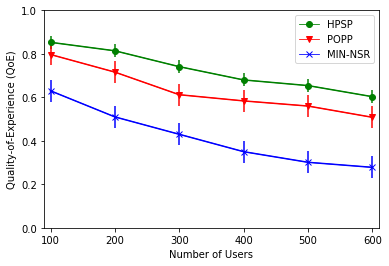

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
    
# x axis values 

x = [100,200,300,400,500,600]

# corresponding y axis values 
y = [0.853,0.814,0.741,0.680,0.654,0.603]

z = [0.796949,0.715946,0.61201,0.5835661,0.5599100,0.50811216]

m = [0.63,0.51,0.43,0.35,0.3012,0.278]

   
plt.errorbar(x, y, yerr=0.03,color = 'green')
plt.errorbar(x, z, yerr=0.05,color = 'red')
plt.errorbar(x, m, yerr=0.05,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Number of Users') 

# naming the y axis 
plt.ylabel('Quality-of-Experience (QoE)') 

plt.ylim([0, 1])
plt.xlim([90, 610])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper right")

plt.savefig('uservarryQOE.pdf')  
plt.savefig('uservarryQOE.png') 
plt.show() 
# plt.close() 


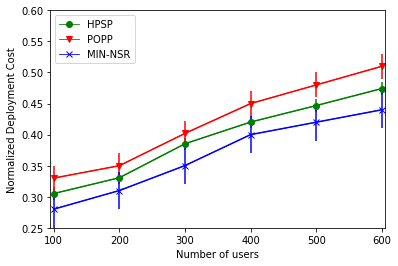

In [ ]:
# cost
import matplotlib.pyplot as plt 

    
# x axis values 
x = [100,200,300,400,500,600]
# corresponding y axis values 

y = [0.3051218,0.330592,0.38535,0.42025450,0.44680,0.47419]

z = [0.33,0.35,0.402,0.45,0.48,0.51]
m = [0.280,0.31,0.3502,0.40,0.42,0.44]
    
# plotting the points  
plt.errorbar(x, y, yerr=0.01,color = 'green')
plt.errorbar(x, z, yerr=0.02,color = 'red')
plt.errorbar(x, m, yerr=0.03,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)

    
# naming the x axis 
plt.xlabel('Number of users') 
# naming the y axis 
plt.ylabel('Normalized Deployment Cost') 


plt.ylim([0.25, 0.6])
plt.xlim([95, 605])

plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper left")
plt.savefig('uservarryCOST.pdf')
plt.savefig('uservarryCOST.png')  
plt.show() 
# plt.close() 

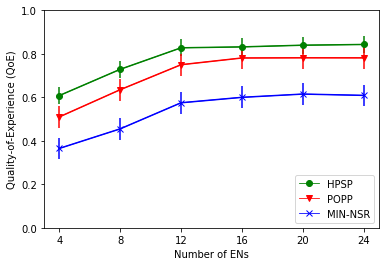

In [ ]:
#edge varry user fixed vs qoe

from matplotlib import pyplot as plt
import numpy as np
x = [4,8,12,16,20,24]
# y = [0.608083,0.7588199,0.857817,0.803,0.772,0.752]
y = [0.608083,0.7288199,0.827817 ,0.831941 ,0.839770,0.84313]
# z = [0.45,0.55,0.69,0.60,0.58,0.54]
# m = [0.31,0.35,0.442,0.40,0.38,0.36]

z = [0.51,0.635,0.75,0.781,0.7819,0.7816]
m = [0.365,0.455,0.575,0.60,0.615,0.609]

default_x_ticks = range(len(x))

plt.errorbar(default_x_ticks, y, yerr=0.04 ,color = 'green')
plt.errorbar(default_x_ticks, z, yerr=0.05 ,color = 'red')
plt.errorbar(default_x_ticks, m, yerr=0.05 ,color = 'blue')


plt.plot(default_x_ticks, y,color="green",marker = 'o', linewidth=0.8 )
plt.plot(default_x_ticks, z,color="red",marker = 'v', linewidth=0.8 )
plt.plot(default_x_ticks, m,color="blue",marker = 'x', linewidth=0.8)


# naming the x axis 
plt.xlabel('Number of ENs') 
# naming the y axis 
plt.ylabel('Quality-of-Experience (QoE)') 



plt.xticks(default_x_ticks, x)
plt.ylim([0, 1])



plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="lower right")
plt.savefig('edgevarryQOE.pdf') 
plt.savefig('edgevarryQOE.png')  
plt.show() 
plt.close() 

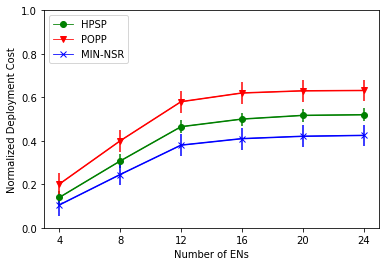

In [ ]:
#user fixed vs cost edge vary

from matplotlib import pyplot as plt

x = [4,8,12,16,20,24]
# y = [0.111,0.180,0.25,0.36,0.43,0.52]
# y = [0.111,0.180,0.25,0.36,0.43,0.52]
# y= [0.33950 ,0.61272 ,0.78388  ,0.85580 ,0.8606 ,0.883466]
y= [0.13950 ,0.3072 ,0.465  ,0.50 ,0.517 ,0.52]
z = [0.201,0.40,0.58,0.62,0.63,0.6315]
m = [0.105,0.245,0.3802,0.41,0.421,0.425]

default_x_ticks = range(len(x))

plt.errorbar(default_x_ticks, y, yerr=0.03 ,color = 'green')
plt.errorbar(default_x_ticks, z, yerr=0.05 ,color = 'red')
plt.errorbar(default_x_ticks, m, yerr=0.05 ,color = 'blue')


plt.plot(default_x_ticks, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(default_x_ticks, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(default_x_ticks, m,color="blue",marker = 'x', linewidth=0.8)

# naming the x axis 
plt.xlabel('Number of ENs') 
# naming the y axis 
plt.ylabel('Normalized Deployment Cost') 


plt.xticks(default_x_ticks, x)
plt.ylim([0, 1])


plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper left")
plt.savefig('edgevarryCOST.pdf')
plt.savefig('edgevarryCOST.png')

plt.show() 
plt.close() 

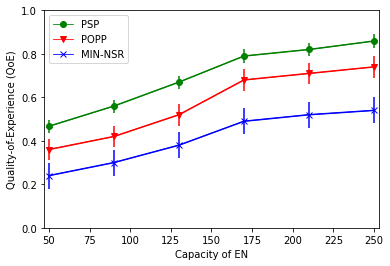

In [ ]:
#QOE WHEN edge capacity vary

from matplotlib import pyplot as plt

x = [50,90,130,170,210,250]
y = [0.467,0.56,0.67,0.79,0.82,0.859]
z = [0.36,0.42,0.52,0.68,0.71,0.74]
m = [0.24,0.30,0.38,0.49,0.52,0.54]


plt.errorbar(x, y, yerr=0.03 ,color = 'green')
plt.errorbar(x, z, yerr=0.05 ,color = 'red')
plt.errorbar(x, m, yerr=0.06 ,color = 'blue')


plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)

# naming the x axis 
plt.xlabel('Capacity of EN') 
# naming the y axis 
plt.ylabel('Quality-of-Experience (QoE)') 



plt.xlim([47, 253])
plt.ylim([0, 1])


plt.legend(["PSP", "POPP","MIN-NSR"], loc ="upper left")
plt.show()

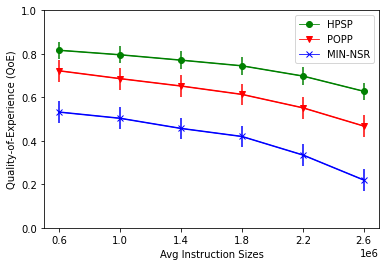

In [ ]:
# importing the required module 
#Quality-of-Experience_Instruction Size.jpg
import matplotlib.pyplot as plt 
    
# x axis values 

x = [600000,1000000,1400000,1800000,2200000,2600000]
xlab=[0.6,1.0,1.4,1.8,2.2,2.6]

# corresponding y axis values 
y = [0.81635,0.79569,0.771,0.745,0.698,0.628]

z = [0.721949,0.685946,0.65201,0.6135661,0.5519100,0.46811216]

m = [0.53215,0.5036,0.457,0.42,0.335,0.22]

   
plt.errorbar(x, y, yerr=0.04,color = 'green')
plt.errorbar(x, z, yerr=0.05,color = 'red')
plt.errorbar(x, m, yerr=0.05,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Avg Instruction Sizes') 

# naming the y axis 
plt.ylabel('Quality-of-Experience (QoE)') 
plt.xticks(x)
plt.ylim([0, 1])
# plt.xlim([600000, 2600000])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper right")

plt.savefig('Quality-of-Experience_Instruction Size.png')  
plt.savefig('Quality-of-Experience_Instruction Size.pdf')
plt.show() 
# plt.close() 

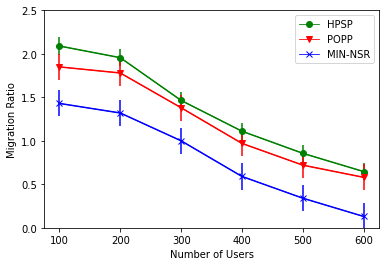

In [ ]:
# importing the required module 
    #'Number of User_Proactive_Reactive.jpg'
# x axis values 

x = [100,200,300,400,500,600]

# corresponding y axis values 
y = [2.09,1.956,1.4642,1.11,0.856,0.646]

z = [1.85,1.78,1.38,0.97,0.72,0.58]

m = [1.43,1.32,1,0.59,0.34,0.13]

   
plt.errorbar(x, y, yerr=0.1,color = 'green')
plt.errorbar(x, z, yerr=0.15,color = 'red')
plt.errorbar(x, m, yerr=0.15,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Number of Users') 

# naming the y axis 
plt.ylabel('Migration Ratio') 

plt.ylim([0, 2.5])
# plt.xlim([100, 600])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper right")

plt.savefig('Number of User_Proactive_Reactive.png')
plt.savefig('Number of User_Proactive_Reactive.pdf')  
plt.show() 
# plt.close() 

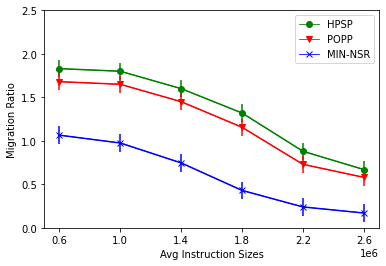

In [ ]:
# importing the required module 
#Avg Instruction Size_Proactive_Reactive.jpg
import matplotlib.pyplot as plt
import numpy as np
 
    
# x axis values 

x = np.array([600000,1000000,1400000,1800000,2200000,2600000])
xlab=np.array([0.6,1.0,1.4,1.8,2.2,2.6])
default_x_ticks = range(len(x))

# corresponding y axis values 
y = np.array([1.83,1.8,1.6,1.32,0.88,0.67])


z = [1.68,1.65,1.45,1.156,0.73,0.58]

m = [1.065,0.975,0.746,0.43,0.24,0.17]

   
plt.errorbar(x, y, yerr=0.1,color = 'green')
plt.errorbar(x, z, yerr=0.1,color = 'red')
plt.errorbar(x, m, yerr=0.1,color = 'blue')
    
# plotting the points  
plt.plot(x , y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Avg Instruction Sizes') 

# naming the y axis 
plt.ylabel('Migration Ratio') 
plt.xticks(x)
# plt.yticks()

plt.ylim([0, 2.5])
# plt.xticks(default_x_ticks,x)
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper right")
plt.savefig('Avg Instruction Size_Proactive_Reactive.png')
plt.savefig('Avg Instruction Size_Proactive_Reactive.pdf') 
plt.show() 
# plt.close() 

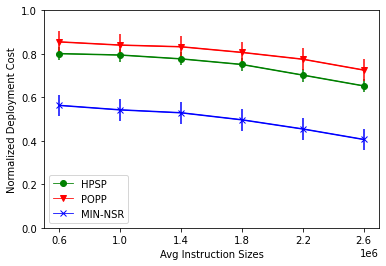

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
#Normalized Deployment Cost_Avg Instruction
    
# x axis values 

x = [600000,1000000,1400000,1800000,2200000,2600000]
xlab=[0.6,1.0,1.4,1.8,2.2,2.6]

# corresponding y axis values 
# y = [0.820,0.790,0.765,0.689,0.542,0.3026]
y = [0.801,0.79456,0.7769,0.75112,0.7023,0.65266]

z = [0.855,0.84025,0.83256,0.8066,0.7753,0.7255]

m = [0.563,0.54236,0.528996,0.4966,0.4545,0.40633]

   
plt.errorbar(x, y, yerr=0.03,color = 'green')
plt.errorbar(x, z, yerr=0.05,color = 'red')
plt.errorbar(x, m, yerr=0.05,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Avg Instruction Sizes') 

# naming the y axis 
plt.ylabel('Normalized Deployment Cost') 

plt.ylim([0, 1])
plt.xticks(x)
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="lower left")

plt.savefig('Normalized Deployment Cost_Avg Instruction.png')
plt.savefig('Normalized Deployment Cost_Avg Instruction.pdf')  
plt.show() 
plt.close() 

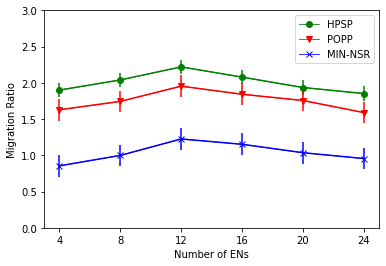

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
    
# x axis values 

x = [4,8,12,16,20,24]
default_x_ticks = range(len(x))

# corresponding y axis values 
y = [1.9,2.04,2.22,2.07896,1.93569,1.85231]
z = [1.6285,1.744,1.954,1.84256,1.75632,1.58996]

m = [0.855,0.99856,1.2256,1.1523,1.036,0.9556]

   
plt.errorbar(default_x_ticks, y, yerr=0.1,color = 'green')
plt.errorbar(default_x_ticks, z, yerr=0.15,color = 'red')
plt.errorbar(default_x_ticks, m, yerr=0.15,color = 'blue')
    
# # plotting the points  
plt.plot(default_x_ticks, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(default_x_ticks, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(default_x_ticks, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Number of ENs') 

# naming the y axis 
plt.ylabel('Migration Ratio') 

plt.ylim([0, 3])
plt.xticks(default_x_ticks, x)
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper right")

plt.savefig('Number of ENs_Proactive_Reactive.png')
plt.savefig('Number of ENs_Proactive_Reactive.pdf')  
plt.show() 
# plt.close() 

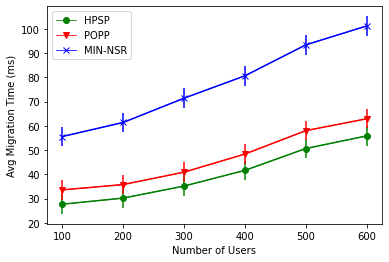

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 

    #'Number of User_Proactive_Reactive.jpg'
# x axis values 

x = [100,200,300,400,500,600]

# corresponding y axis values 
# y = [1.846,2.147,2.34449,2.7759,3.3756,3.72156]
y = [27.69,30.205,35.167,41.638,50.634,55.823]

z = [33.589,35.786,40.899,48.356,58.002,62.889]

m = [55.569,61.369,71.369,80.59,93.34,101.13]

   
plt.errorbar(x, y, yerr=4,color = 'green')
plt.errorbar(x, z, yerr=4,color = 'red')
plt.errorbar(x, m, yerr=4,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Number of Users') 

# naming the y axis 
plt.ylabel('Avg Migration Time (ms)') 

# plt.ylim([0, 4])
# plt.xlim([100, 600])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper left")

plt.savefig('Number of User_Mig Time.png')
plt.savefig('Number of User_Mig Time.pdf')  
plt.show() 
# plt.close() 

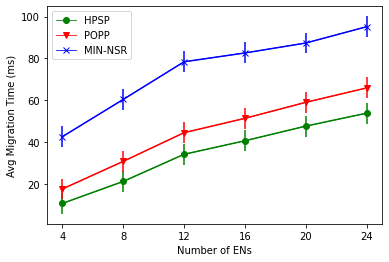

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 

    #'Number of User_Proactive_Reactive.jpg'
# x axis values 

x = [4,8,12,16,20,24]

# corresponding y axis values 
# y = [1.846,2.147,2.34449,2.7759,3.3756,3.72156]
y = [10.69,21.205,34.167,40.638,47.634,53.823]

z = [17.589,30.786,44.499,51.356,59.002,65.889]

m = [42.569,60.369,78.369,82.59,87.34,95.13]

   
plt.errorbar(x, y, yerr=5,color = 'green')
plt.errorbar(x, z, yerr=5,color = 'red')
plt.errorbar(x, m, yerr=5,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Number of ENs') 

# naming the y axis 
plt.ylabel('Avg Migration Time (ms)') 
plt.xticks(x)
# plt.ylim([0, 4])
# plt.xlim([100, 600])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper left")

plt.savefig('Number of ENs_Mig Time.png')
plt.savefig('Number of ENs_Mig Time.pdf')  
plt.show() 
# plt.close() 

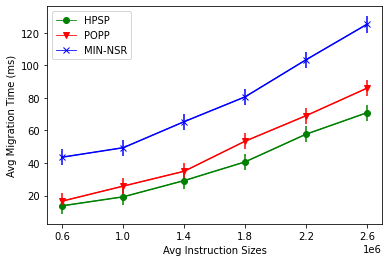

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 

    #'Number of User_Proactive_Reactive.jpg'
# x axis values 

x = [600000,1000000,1400000,1800000,2200000,2600000]

# corresponding y axis values 
# y = [1.846,2.147,2.34449,2.7759,3.3756,3.72156]
y = [13.69,19.205,29.167,40.638,57.634,70.823]

z = [16.589,25.786,34.899,53.356,69.002,85.889]

m = [43.569,49.369,65.369,80.59,103.34,125.13]

   
plt.errorbar(x, y, yerr=5,color = 'green')
plt.errorbar(x, z, yerr=5,color = 'red')
plt.errorbar(x, m, yerr=5,color = 'blue')
    
# plotting the points  
plt.plot(x, y,color="green",marker = 'o', linewidth=0.8)
plt.plot(x, z,color="red",marker = 'v', linewidth=0.8)
plt.plot(x, m,color="blue",marker = 'x', linewidth=0.8)


    
# naming the x axis 
plt.xlabel('Avg Instruction Sizes') 

# naming the y axis 
plt.ylabel('Avg Migration Time (ms)') 
plt.xticks(x)
# plt.ylim([0, 4])
# plt.xlim([100, 600])
plt.legend(["HPSP", "POPP","MIN-NSR"], loc ="upper left")

plt.savefig('Avg Instruction Size_Mig Time.png')
plt.savefig('Avg Instruction Size_Mig Time.pdf')  
plt.show() 
# plt.close() 

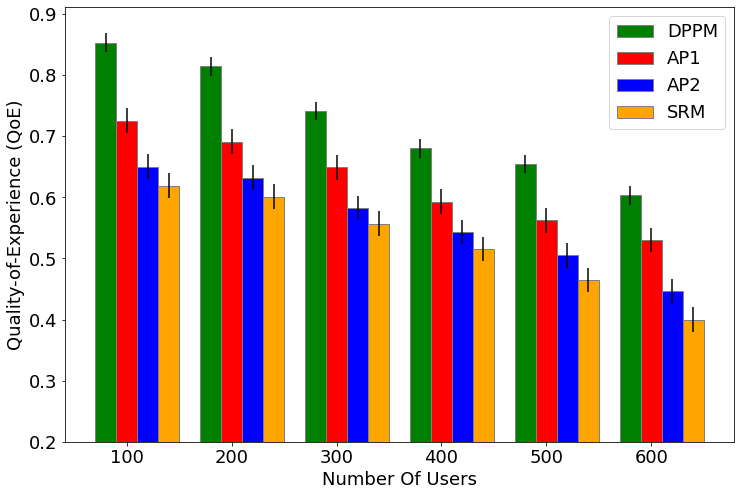

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.20
fig,ax = plt.subplots(figsize =(12, 8))

# set height of bar 
DPPM = [0.853,0.814,0.741,0.680,0.654,0.603]
# ERM = [0.7501,0.72233,0.69921,0.6351,0.605,0.576]
AP1 = [0.7255,0.6911,0.649,0.593,0.5623,0.5303]
AP2 = [0.6501,0.63233,0.5821,0.543,0.505,0.446]
SRM = [0.619, 0.601, 0.557,0.5151, 0.465, 0.400]

# Set position of bar on X axis
br0 = np.arange(len(DPPM))
br1= [x + barWidth for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br0, DPPM, yerr=0.015 ,color ='g', width = barWidth,
		edgecolor ='grey', label ='DPPM')
plt.bar(br1, AP1, yerr=0.02 ,color ='r', width = barWidth,
		edgecolor ='grey', label ='AP1')
plt.bar(br2, AP2, yerr=0.02 ,color ='b', width = barWidth,
		edgecolor ='grey', label ='AP2')
plt.bar(br3, SRM, yerr=0.02 ,color ='orange', width = barWidth,
		edgecolor ='grey', label ='SRM')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(18)

# Adding Xticks
plt.xlabel('Number Of Users', fontsize = 18)
plt.ylabel('Quality-of-Experience (QoE)', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(DPPM))],
		['100', '200', '300', '400', '500','600'])

plt.legend(prop={'size': 18})
plt.ylim(0.2)
plt.savefig('PPM_Q.pdf')
plt.savefig('PPM_Q.jpg')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

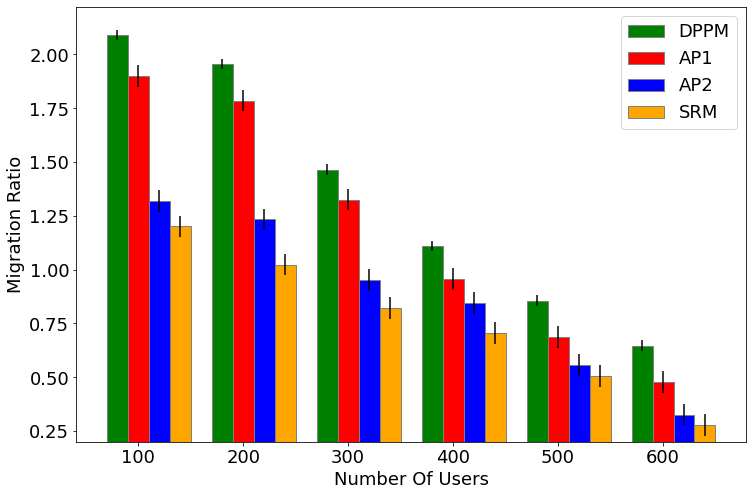

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.20
fig,ax = plt.subplots(figsize =(12, 8))

# set height of bar
DPPM = [2.09,1.956,1.4642,1.11,0.856,0.646]
AP1 = [1.90,1.785,1.325,0.956,0.688,0.478]
AP2 = [1.3201,1.233,0.951,0.8451,0.558,0.326]
SRM = [1.201,1.023,0.821,0.7051,0.505,0.277]

# Set position of bar on X axis
br0 = np.arange(len(DPPM))
br1= [x + barWidth for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br0, DPPM, yerr=0.025 ,color ='g', width = barWidth,
		edgecolor ='grey', label ='DPPM')
plt.bar(br1, AP1, yerr=0.05 ,color ='r', width = barWidth,
		edgecolor ='grey', label ='AP1')
plt.bar(br2, AP2, yerr=0.05 ,color ='b', width = barWidth,
		edgecolor ='grey', label ='AP2')
plt.bar(br3, SRM, yerr=0.05 ,color ='orange', width = barWidth,
		edgecolor ='grey', label ='SRM')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(18)

# Adding Xticks
plt.xlabel('Number Of Users', fontsize = 18)
plt.ylabel('Migration Ratio', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(DPPM))],
		['100', '200', '300', '400', '500','600'])

plt.legend(prop={'size': 18})
plt.ylim(0.2)
plt.savefig('PPM_ratio.pdf')
plt.savefig('PPM_ratio.jpg')
plt.show()
